<a href="https://colab.research.google.com/github/mirzafaradiba01/Machine-Learning/blob/main/3A_18_Mirza%20Priscilla%20Faradiba_KUIS%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
#instal paket tesseract OCR menggunakan apt
!sudo apt install tesseract-ocr
#menginstal pyton memungkinkan menggunakan tessearct OCR langsung dari pyton
!pip install pytesseract
#menginstal bahasa indonesia untuk tesseract OCR
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,226 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [4]:
#Import Library yang digunakan
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

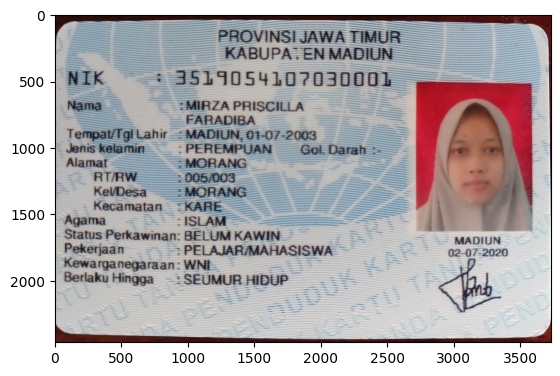

In [46]:
img = cv2.imread("/content/drive/MyDrive/ML/dataset ktp/20231202_155326.jpg")
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image)

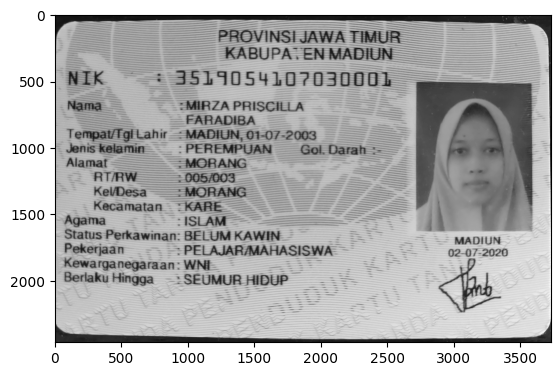

In [48]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

In [49]:
#melakukan thresholding citra skala abu-abu
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)

In [50]:
result = pytesseract.image_to_string((threshed), lang='ind')
result

" \n\nPROVINSI JAWA TIMUR\nKABUPA. EN MADIUN\n\n \n\nNIK : 3519054107030001\nNama :MIRZA PRISCILLA\nFARADIBA\n\nTempat/Tgi Lahir : MADIUN, 01-07-2003\nJenis kelamin PEREMPUAN Gol. Darah :-\nAlamat : MORANG\n\nRT/RW : 6651/9503\n\nKelDesa ' MORANG\n\nKecamatan : KARE\nAgama ISLAM\nStatus Perkawinan: BELUM KAWIN MADIUN\nPekerjaan : PELAJAR/MAHASISWA 02-07-2020\nKewarganegaraan :\n\nBerlaku Hingga\n\nWNI ),\n' SEUMUR HIDUP Ye\n\n \n\x0c"

In [51]:
#iterasi melalui setiap kata dalam teks hasil ekstraksi berdasarkan baris baru
for word in result.split('\n'):
    if "``_" in word:
        word = word.replace("''_", ":")

    #apakah kata tersebut mengandung "NIK"
    if "NIK" in word:
        nik_chars = word.split()
        for i in range(len(nik_chars)):
            if "D" in nik_chars[i]:
                nik_chars[i] = nik_chars[i].replace("D", "0")
            if "?" in nik_chars[i]:
                nik_chars[i] = nik_chars[i].replace("?", "7")

        word = ' '.join(nik_chars)

    print(word)

 

PROVINSI JAWA TIMUR
KABUPA. EN MADIUN

 

NIK : 3519054107030001
Nama :MIRZA PRISCILLA
FARADIBA

Tempat/Tgi Lahir : MADIUN, 01-07-2003
Jenis kelamin PEREMPUAN Gol. Darah :-
Alamat : MORANG

RT/RW : 6651/9503

KelDesa ' MORANG

Kecamatan : KARE
Agama ISLAM
Status Perkawinan: BELUM KAWIN MADIUN
Pekerjaan : PELAJAR/MAHASISWA 02-07-2020
Kewarganegaraan :

Berlaku Hingga

WNI ),
' SEUMUR HIDUP Ye

 



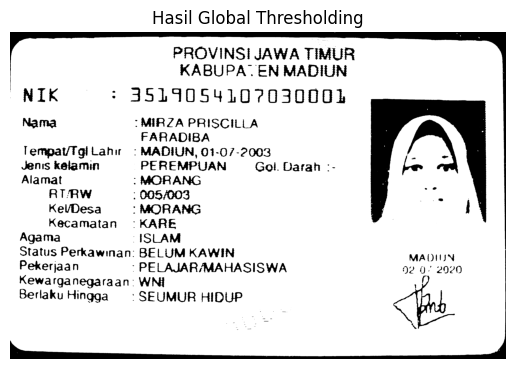

Teks yang terbaca dari KTP dengan Global Thresholding:
PROVINSI JAWA TIMUR
KABUPA~EN MADIUN

NIK +: 35149054107030001

 

 

Nama >MIRZA PRISCILLA
FARADIBA

Tempat/TgiLahi : MADIUN, 01-07-2003
Jenis kealamin ~PEREMPUAN Goi. Darah :-
Alamat - MORANG

RT/RW . 005/003

Kel/Desa ' MORANG

Kecamatan :° KARE
Agama “ISLAM
Status Perkawinan: BELUM KAWIN MAL()ILIN
Pekerjaan > PELAJAR/AMAHASISWA 92 0" 2020

Kewarganegaraan: WN
Berlaku Hingga =. SEUMUR HIDUP

 



In [10]:
import pytesseract
# Membaca gambar KTP
img = cv2.imread('/content/drive/MyDrive/ML/dataset ktp/20231202_155326.jpg', 0)  # Baca dalam mode grayscale

# Lakukan Global Thresholding
ret, thresh = cv2.threshold(img, 95, 255, cv2.THRESH_BINARY)

# Tampilkan gambar setelah thresholding
plt.imshow(thresh, cmap='gray')
plt.title('Hasil Global Thresholding')
plt.axis('off')
plt.show()

# Konversi hasil thresholding ke format yang bisa dibaca Tesseract (dalam bentuk string)
text = pytesseract.image_to_string(thresh)

# Tampilkan teks yang terbaca
print("Teks yang terbaca dari KTP dengan Global Thresholding:")
print(text)